In [1]:
# Import necessary libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Load battery data from B0005.mat
file_path = "C:/Users/Roxana/satelite_predictive_data/1. BatteryAgingARC-FY08Q4/B0005.mat"
mat_data = scipy.io.loadmat(file_path)
battery_data = mat_data['B0005']
cycles = battery_data['cycle'][0, 0][0]  # Access 616 cycles
print("Number of cycles:", len(cycles))

Number of cycles: 616


In [4]:
# Extract and sort capacities from discharge cycles
capacities = []
cycle_indices = []

for i in range(len(cycles)):
    cycle_type = cycles[i]['type'][0]
    if cycle_type == 'discharge':
        data_field = cycles[i]['data']
        measurements = data_field[0]
        if 'Capacity' in measurements.dtype.names:
            capacity = float(measurements['Capacity'][0].item())
            capacities.append(capacity)
            cycle_indices.append(i)

# Sort capacities in descending order (highest to lowest)
sorted_indices = np.argsort(capacities)[::-1]
capacities = [capacities[i] for i in sorted_indices]
cycle_indices = [cycle_indices[i] for i in sorted_indices]

print(f"Found {len(capacities)} discharge cycles")
print("Capacities (first 5):", capacities[:5])

Found 168 discharge cycles
Capacities (first 5): [1.8564874208181574, 1.8518025516704486, 1.847417311283644, 1.8470259949329193, 1.846327249719927]


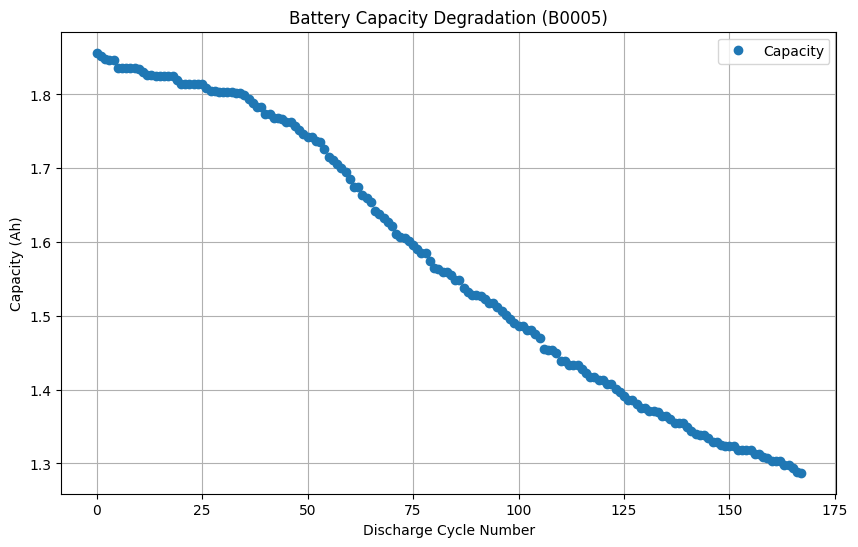

Min capacity: 1.2874525221379407
Max capacity: 1.8564874208181574
First capacity: 1.8564874208181574
Last capacity: 1.2874525221379407


In [5]:
# Plot capacity degradation over discharge cycles
cycle_numbers = list(range(len(capacities)))

plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, capacities, 'o', label="Capacity")
plt.xlabel("Discharge Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.title("Battery Capacity Degradation (B0005)")
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
print("Min capacity:", min(capacities))
print("Max capacity:", max(capacities))
print("First capacity:", capacities[0])
print("Last capacity:", capacities[-1])

Predicted cycles to failure (at 1.4 Ah): 127


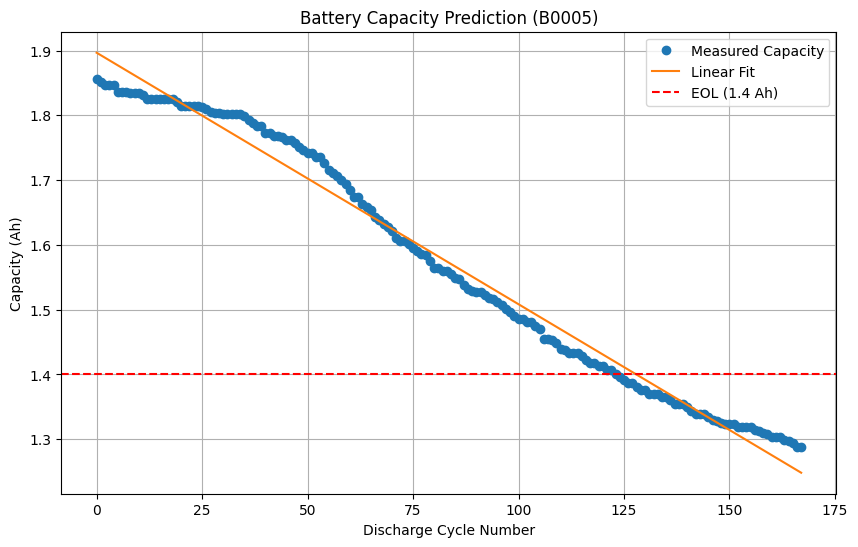

First cycle below 1.4 Ah: 124


In [6]:
# Predict Remaining Useful Life (RUL) with linear regression
X = np.array(cycle_numbers).reshape(-1, 1)
y = np.array(capacities)

model = LinearRegression()
model.fit(X, y)

threshold = 1.4  # End of Life (EOL) threshold from README
cycles_to_failure = int((threshold - model.intercept_) / model.coef_[0])
print(f"Predicted cycles to failure (at {threshold} Ah): {cycles_to_failure}")

plt.figure(figsize=(10, 6))
plt.plot(cycle_numbers, capacities, 'o', label="Measured Capacity")
plt.plot(cycle_numbers, model.predict(X), '-', label="Linear Fit")
plt.axhline(y=threshold, color='r', linestyle='--', label="EOL (1.4 Ah)")
plt.xlabel("Discharge Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.title("Battery Capacity Prediction (B0005)")
plt.legend()
plt.grid(True)
plt.show()

# Check actual cycles below threshold
below_threshold = [i for i, cap in enumerate(capacities) if cap <= 1.4]
if below_threshold:
    print(f"First cycle below 1.4 Ah: {below_threshold[0]}")